In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import pandas as pd
from skimage.segmentation import mark_boundaries, watershed

from src.data.monuseg.tf_data import get_dataset, tf_random_crop, get_split, to_sparse


In [2]:
info_df = pd.read_csv("/home/valentin/python_wkspce/2d_bispectrum_cnn/data/raw/MoNuSeg2018Training/MoNuSeg2018_info.csv")

In [3]:
info_df.columns

Index(['patient_id', 'organ', 'disease_type'], dtype='object')

In [4]:
patient_ids = info_df[info_df["organ"].isin(["Breast", "Liver", "Kidney", "Prostate"])]["patient_id"].values

In [5]:
ids_train, ids_val, ids_test = get_split()

In [6]:
ids_train

['TCGA-A7-A13F-01Z-00-DX1',
 'TCGA-E2-A14V-01Z-00-DX1',
 'TCGA-AR-A1AK-01Z-00-DX1',
 'TCGA-50-5931-01Z-00-DX1',
 'TCGA-21-5784-01Z-00-DX1',
 'TCGA-49-4488-01Z-00-DX1',
 'TCGA-B0-5698-01Z-00-DX1',
 'TCGA-HE-7128-01Z-00-DX1',
 'TCGA-B0-5710-01Z-00-DX1',
 'TCGA-G9-6348-01Z-00-DX1',
 'TCGA-G9-6336-01Z-00-DX1',
 'TCGA-G9-6362-01Z-00-DX1']

In [7]:
# ds = get_dataset(id_list=patient_ids, is_test=False).map(
#     lambda x, y: tf_random_crop(x, y, rotation_angle="right-angle", filter_segmentation=False)).map(
#         lambda x, y: (x, to_sparse(y))).as_numpy_iterator()
# ds = get_dataset(id_list=patient_ids).as_numpy_iterator()
ds = get_dataset(id_list=patient_ids, is_test=True).as_numpy_iterator()

In [8]:
image, mask = next(ds)

In [9]:
mask.shape

(1000, 1000, 3)

In [10]:
np.max(mask)

1.0

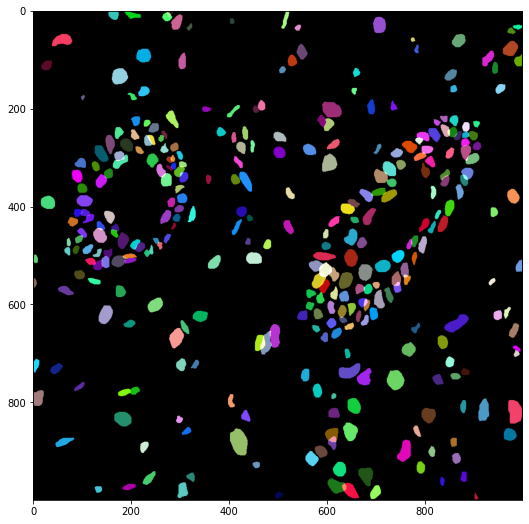

In [11]:
plt.figure(figsize=(9,9))
plt.imshow(mask)
# plt.colorbar()

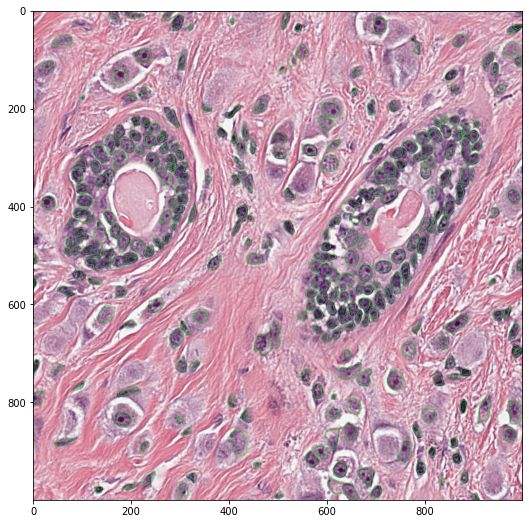

In [12]:
image_annotated = mark_boundaries(
    image,
    mask[:, :, 0].astype(bool),
    color=(0, 1, 0),
    mode="inner"
)
plt.figure(figsize=(9, 9))
plt.imshow(image_annotated)

In [ ]:
ds = get_dataset(id_list=patient_ids).as_numpy_iterator()
n_background = 0
n_foreground = 0
n_border = 0
for image, seg in ds:
    n_border += np.sum(seg[:, :, 1])
    n_foreground += np.sum(seg[:, :, 0])
    n_background += np.sum(seg[:, :, 2])
ratio_foreground = n_foreground / (n_background + n_foreground + n_border)
ratio_border = n_border / (n_background + n_foreground + n_border)
ratio_background = n_background / (n_background + n_foreground + n_border)
print(
    f"The ratio of foreground, border and backgroun are {ratio_foreground}, {ratio_border}, {ratio_background}, respectively "
)
print(
    f"The alpha of foreground, border and backgroun are {1-ratio_foreground}, {1-ratio_border}, {1-ratio_background}, respectively "
)
print(
    f"The class weights of foreground, border and backgroun are {1/ratio_foreground/3}, {1/ratio_border/3}, {1/ratio_background/3}, respectively "
)

In [ ]:
n_background + n_foreground + n_border

In [ ]:
w = watershed(mask[:, :, 1], mask=mask[:, :, 0])


In [ ]:
plt.imshow(w)
plt.colorbar()

In [ ]:
w.shape

In [ ]:
mask = np.load("/home/valentin/python_wkspce/2d_bispectrum_cnn/data/raw/MoNuSeg2018Training/MasksV2_instance/binary/TCGA-A7-A13F-01Z-00-DX1.npy")

In [ ]:
len(np.unique(mask))

In [ ]:
plt.imshow(mask)